In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
# nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
# from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [2]:
df = pd.read_csv("D:\Programming\BE PROJECT\datasets\\bullying_dataset.csv")
df

,racism,sexism,other,none,label,tweet,category,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,0.0,1.0,0.0,0.0,2.0,s to other Halloween Hoes or else you a TRICK ...,sexism,NaN,NaN,NaN,NaN
1,0.0,1.0,0.0,0.0,2.0,the fbi has finally id d the zodiac killer wha...,sexism,NaN,NaN,NaN,NaN
2,1.0,0.0,0.0,0.0,1.0,God must have a plan for me to have someone ou...,racism,NaN,NaN,NaN,NaN
3,0.0,1.0,0.0,0.0,2.0,Fuckin that bitch from the back and hearing he...,sexism,NaN,NaN,NaN,NaN
4,0.0,1.0,0.0,0.0,2.0,bitch cunt gay slut,sexism,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10050,0.0,0.0,0.0,1.0,0.0,Check out this listing I just added to my clos...,none,NaN,NaN,NaN,NaN
10051,0.0,0.0,0.0,1.0,0.0,how are you not someone who can do it? looks l...,none,NaN,NaN,NaN,NaN
10052,0.0,0.0,0.0,1.0,0.0,i hate the schools that dont let ppl wear ripp...,none,NaN,NaN,NaN,NaN
10053,0.0,0.0,0.0,1.0,0.0,Amazon: $12 Under Armour Girls Fly by Shorts (...,none,NaN,NaN,NaN,NaN


In [3]:
df.shape

(10055, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10055 entries, 0 to 10054
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   racism       10055 non-null  float64
 1   sexism       10055 non-null  float64
 2   other        10055 non-null  float64
 3   none         10055 non-null  float64
 4   label        10055 non-null  float64
 5   tweet        10055 non-null  object 
 6   category     10055 non-null  object 
 7   Unnamed: 7   0 non-null      float64
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  1 non-null      object 
dtypes: float64(8), object(3)
memory usage: 864.2+ KB


In [5]:
df['racism'].fillna(0, inplace = True)
df['racism'].isnull().sum()

0

In [6]:
df['sexism'].fillna(0, inplace = True)
df['sexism'].isnull().sum()

0

In [7]:
df['other'].fillna(0, inplace = True)
df['other'].isnull().sum()

0

In [8]:
df['none'].fillna(0, inplace = True)
df['none'].isnull().sum()

0

In [9]:
df['category'].isnull().sum()

0

In [10]:
for index_label, row_series in df.iterrows():
    
    if df.at[index_label, 'none'] == 1:
        df.at[index_label, 'label'] = 0

        df.at[index_label, 'category'] = 'none' 
    
      
    elif df.at[index_label, 'racism'] == 1:
        
        df.at[index_label, 'label'] = 1        
        df.at[index_label, 'category'] = 'racism'
        
          
    elif df.at[index_label, 'sexism'] == 1:
        
        df.at[index_label, 'label'] = 2      

        df.at[index_label, 'category'] = 'sexism'
          
    elif df.at[index_label, 'other'] == 1:
        
        df.at[index_label, 'label'] = 3        

        df.at[index_label, 'category'] = 'other'
        

In [11]:
df.to_csv("D:\Programming\BE PROJECT\datasets\\bullying_dataset.csv", index = False)
df = pd.read_csv("D:\Programming\BE PROJECT\datasets\\bullying_dataset.csv")
df

,racism,sexism,other,none,label,tweet,category,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,0.0,1.0,0.0,0.0,2.0,s to other Halloween Hoes or else you a TRICK ...,sexism,NaN,NaN,NaN,NaN
1,0.0,1.0,0.0,0.0,2.0,the fbi has finally id d the zodiac killer wha...,sexism,NaN,NaN,NaN,NaN
2,1.0,0.0,0.0,0.0,1.0,God must have a plan for me to have someone ou...,racism,NaN,NaN,NaN,NaN
3,0.0,1.0,0.0,0.0,2.0,Fuckin that bitch from the back and hearing he...,sexism,NaN,NaN,NaN,NaN
4,0.0,1.0,0.0,0.0,2.0,bitch cunt gay slut,sexism,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10050,0.0,0.0,0.0,1.0,0.0,Check out this listing I just added to my clos...,none,NaN,NaN,NaN,NaN
10051,0.0,0.0,0.0,1.0,0.0,how are you not someone who can do it? looks l...,none,NaN,NaN,NaN,NaN
10052,0.0,0.0,0.0,1.0,0.0,i hate the schools that dont let ppl wear ripp...,none,NaN,NaN,NaN,NaN
10053,0.0,0.0,0.0,1.0,0.0,Amazon: $12 Under Armour Girls Fly by Shorts (...,none,NaN,NaN,NaN,NaN


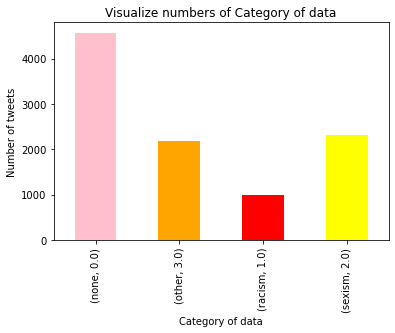

In [12]:
df.groupby('category').label.value_counts().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue"])
plt.xlabel("Category of data")
plt.ylabel('Number of tweets')
plt.title("Visualize numbers of Category of data")
plt.savefig('D:\Programming\BE PROJECT\datasets\\foo.png')
plt.show()

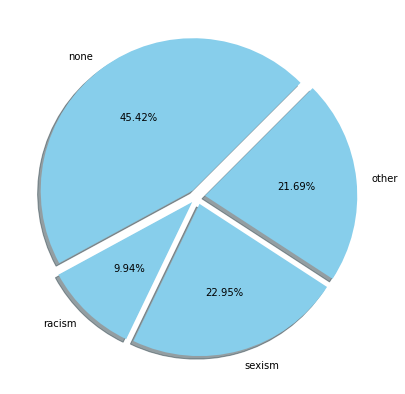

In [13]:
fig = plt.figure(figsize = (10,7))
colors = ["skyblue"]
none = df[df['label'] == 0 ]
racism = df[df['label'] == 1 ]
sexism = df[df['label'] == 2]
other = df[df['label'] == 3]
count = [none['label'].count(), racism['label'].count(), sexism['label'].count(), other['label'].count()]
pie = plt.pie(count, labels = ['none', 'racism', 'sexism', 'other'],
              autopct = "%1.2f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode= (0.05, 0.05, 0.05, 0.05)
             )

In [14]:
from wordcloud import WordCloud

stop = set(stopwords.words('english'))

none = []
racism = []
sexism = []
other = []

for index_label, row_series in df.iterrows():
    
    if df.at[index_label, 'label'] == 0:
        
        none.append(df.at[index_label, 'tweet'])
    
      
    if df.at[index_label, 'label'] == 1:
        
        racism.append(df.at[index_label, 'tweet'])
        
          
    if df.at[index_label, 'label'] == 2:
        
        sexism.append(df.at[index_label, 'tweet'])
          
    if df.at[index_label, 'label'] == 3:
        
        other.append(df.at[index_label, 'tweet'])
        

def wordcloud_draw(dataset, category, color = 'white'):

    words = ' '.join(dataset)

    cleaned_word = ' '.join([word for word in words.split()])

    wordcloud = WordCloud(stopwords = stop,

    background_color = color,

    width = 1600, height = 800).generate(cleaned_word)

    plt.figure(1, figsize = (10,7))

    plt.imshow(wordcloud)

    plt.axis("off")

    
    if category == 'none' :
        
        print('Non Bullying tweets: ')
    
    elif category == 'other':
        
        print('Hate speech realted tweets: ')
    
    else:
        
        print(category + " " + "related tweets : ")
    
    plt.show()



Non Bullying tweets: 


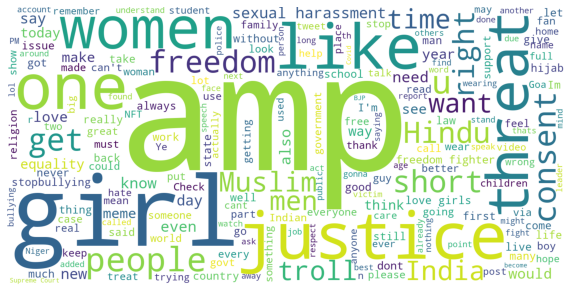

In [36]:
wordcloud_draw(none, 'none')

racism related tweets : 


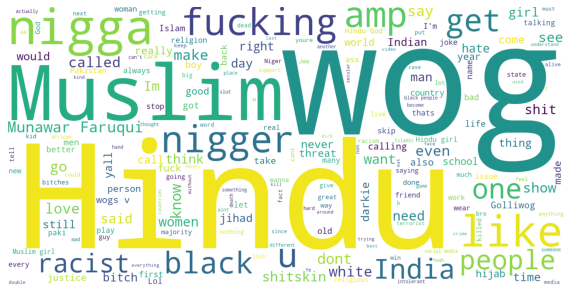

In [37]:
wordcloud_draw(racism, 'racism')

sexism related tweets : 


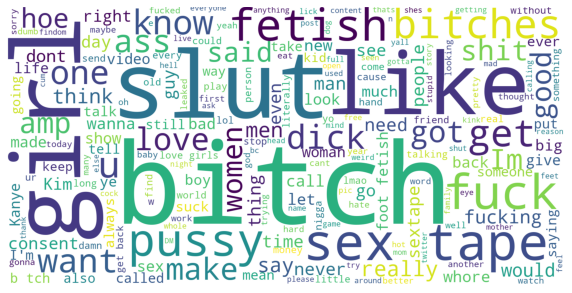

In [38]:
wordcloud_draw(sexism, 'sexism')

Hate speech realted tweets: 


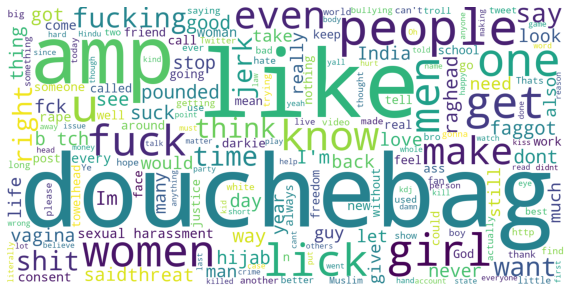

In [39]:
wordcloud_draw(other, 'other')

In [15]:
X = df['tweet']
y = df['category']
print(len(X))
print(len(y))

10055
10055


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(max_features= 5000)
X = tfv.fit_transform(df.tweet).toarray()
y = np.array(df.category.values)

print("X.shape = ",X.shape)
print("y.shape = ",y.shape)

X.shape =  (10055, 5000)
y.shape =  (10055,)


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = True)
print(len(x_train))
print(len(x_test))

8044
2011


In [18]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
y_train

array(['other', 'other', 'other', ..., 'none', 'none', 'none'],
      dtype=object)

In [21]:
y_test

array(['other', 'other', 'other', ..., 'none', 'sexism', 'none'],
      dtype=object)

In [22]:
#create list of model and accuracy dicts
perform_list = [ ]

In [23]:
def run_model(model_name, est_c, est_pnlty):

    mdl= ""


    if model_name == 'Random Forest':

        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy')

    elif model_name == 'Multinomial Naive Bayes':

        mdl = MultinomialNB(alpha=1.0, fit_prior=True)
        
    


    elif model_name == 'Support Vector Classifer':

        mdl = SVC()




    elif model_name == 'Decision Tree Classifier':

        mdl = DecisionTreeClassifier()

    elif model_name == 'K Nearest Neighbour':

        mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)
    
    elif model_name == "Logistic Regression":
        mdl = LogisticRegression(max_iter=1000)
    
    

    oneVsRest = OneVsRestClassifier(mdl)

    oneVsRest.fit(x_train, y_train)

    y_pred = oneVsRest.predict(x_test)

    # Performance metrics

    accuracy = round(accuracy_score(y_test, y_pred), 2)

    # Get precision, recall, f1 scores

    precision, recall, f1score, support = score(y_test, y_pred, average='micro')

    print(f'Test Accuracy Score of Basic {model_name}: {accuracy} ')

    print(f'Precision : {precision}')

    print(f'Recall : {recall}')

    print(f'F1-score : {f1score}')

    # Add performance parameters to list

    perform_list.append(dict([

    ('Model', model_name),

    ('Test Accuracy', round(accuracy, 2)),

    ('Precision', round(precision, 2)),

    ('Recall', round(recall, 2)),

    ('F1', round(f1score, 2))

    ]))

In [24]:
begin = time.time()
run_model('Logistic Regression', est_c=None, est_pnlty=None)
end = time.time()
print("Time taken: ",end - begin)

Test Accuracy Score of Basic Logistic Regression: 0.76 
Precision : 0.7603182496270512
Recall : 0.7603182496270512
F1-score : 0.7603182496270511
Time taken:  10.372554540634155


In [25]:
begin = time.time()
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)
end = time.time()
print("Time taken: ",end - begin)

Test Accuracy Score of Basic Multinomial Naive Bayes: 0.72 
Precision : 0.7165589259075087
Recall : 0.7165589259075087
F1-score : 0.7165589259075087
Time taken:  0.8118894100189209


In [54]:
begin = time.time()
run_model('Support Vector Classifer', est_c=None, est_pnlty=None)
end = time.time()
print("Time taken: ",end - begin)

Test Accuracy Score of Basic Support Vector Classifer: 0.78 
Precision : 0.78269517652909
Recall : 0.78269517652909
F1-score : 0.78269517652909
Time taken:  1076.0032711029053


In [53]:
begin = time.time()
run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)
end = time.time()
print("Time taken: ",end - begin)

Test Accuracy Score of Basic K Nearest Neighbour: 0.51 
Precision : 0.5052212829438091
Recall : 0.5052212829438091
F1-score : 0.5052212829438091
Time taken:  2671.3014421463013


In [52]:
begin = time.time()
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)
end = time.time()

print("Time taken: ",end - begin)

Test Accuracy Score of Basic Decision Tree Classifier: 0.73 
Precision : 0.7304823470909995
Recall : 0.7304823470909995
F1-score : 0.7304823470909995
Time taken:  297.810218334198


In [51]:
begin = time.time()
run_model('Random Forest', est_c=None, est_pnlty=None)
end = time.time()
print("Time taken: ",end - begin)

Test Accuracy Score of Basic Random Forest: 0.8 
Precision : 0.8045748383888612
Recall : 0.8045748383888612
F1-score : 0.8045748383888613
Time taken:  243.97094178199768


In [55]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

,Model,Test Accuracy,Precision,Recall,F1
0,Logistic Regression,0.76,0.76,0.76,0.76
1,Multinomial Naive Bayes,0.72,0.72,0.72,0.72
2,Random Forest,0.80,0.80,0.80,0.80
3,Decision Tree Classifier,0.73,0.73,0.73,0.73
4,K Nearest Neighbour,0.51,0.51,0.51,0.51
5,Support Vector Classifer,0.78,0.78,0.78,0.78


<BarContainer object of 6 artists>

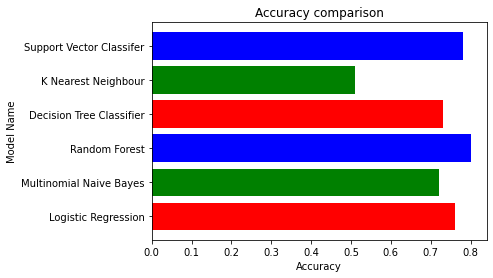

In [89]:
plt.xlabel("Accuracy")
plt.ylabel('Model Name')
plt.title("Accuracy comparison")
plt.savefig('D:\Programming\BE PROJECT\datasets\\accuracy_comparison.png')
plt.barh(model_performance['Model'], model_performance['Test Accuracy'], color= ['red', 'green', 'blue'])


<BarContainer object of 6 artists>

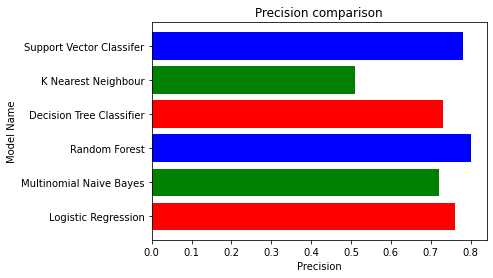

In [90]:
plt.xlabel("Precision")
plt.ylabel('Model Name')
plt.title("Precision comparison")
plt.savefig('D:\Programming\BE PROJECT\datasets\\precision_comparison.png')
plt.barh(model_performance['Model'], model_performance['Precision'], color= ['red', 'green', 'blue'])

<BarContainer object of 6 artists>

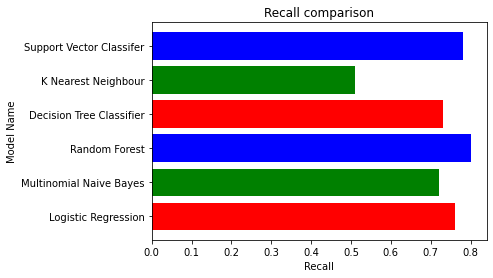

In [91]:
plt.xlabel("Recall")
plt.ylabel('Model Name')
plt.title("Recall comparison")
plt.savefig('D:\Programming\BE PROJECT\datasets\\recall_comparison.png')
plt.barh(model_performance['Model'], model_performance['Recall'], color= ['red', 'green', 'blue'])

<BarContainer object of 6 artists>

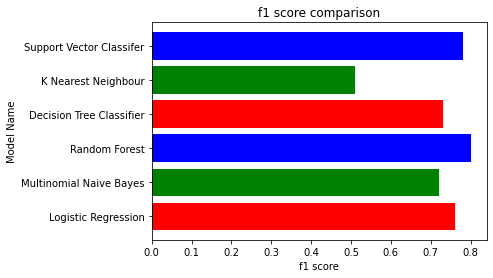

In [92]:
plt.xlabel("f1 score")
plt.ylabel('Model Name')
plt.title("f1 score comparison")
plt.savefig('D:\Programming\BE PROJECT\datasets\\f1_score_comparison.png')
plt.barh(model_performance['Model'], model_performance['F1'], color= ['red', 'green', 'blue'])


In [24]:
model = model_performance["Model"]
max_value = model_performance["Test Accuracy"].max()
print("The best accuracy of model is", max_value, "%")


The best accuracy of model is 80.41 %


In [25]:
classifier = RandomForestClassifier(n_estimators=100 ,criterion='entropy' ).fit(x_train, y_train)
classifier
# y_pred = classifier.predict(x_test)
# y_pred

RandomForestClassifier(criterion='entropy')

In [26]:
# save the model to disk

import joblib
vectorizer_filename= 'D:\Programming\BE PROJECT\\vectorizer.pkl'
model_filename  = 'D:\Programming\BE PROJECT\\model.pkl'

vectorizer = joblib.dump(tfv, vectorizer_filename, compress = 3) # save vectorizer
loaded_vectorizer = joblib.load(vectorizer_filename) # load vectorizer


model = joblib.dump(classifier, model_filename, compress = 3) # save model
loaded_model = joblib.load(model_filename) # load model


In [27]:
# Data fetching
#!pip3 install git+https://github.com/Museum-Barberini/twint.git@fix/RefreshTokenException#egg=twint
import nest_asyncio
nest_asyncio.apply()
import twint, time

try:
    c = twint.Config()
#     c.Username = input("Enter the username : ")
    c.Search = input("Enter the topic you want to search : ")
    c.Lang = "en"

#     c.Near = "India"
    c.Limit = 100
    c.Min_Likes = 100
    c.Store_csv = True       # store tweets in a csv file
    c.Output = "D:/Programming/BE PROJECT/test_tweets/" +c.Search + ".csv"      # path to csv file
    twint.run.Search(c)
    
except Exception as e:
    print(e)
  

Enter the topic you want to search : nigga
1507228663250661405 2022-03-25 11:01:30 +0530 <catacombreaper> @snoopypoop7 I would’ve even punch that nigga ew😭
1507228655478616074 2022-03-25 11:01:29 +0530 <ksogranddd> a bitch add me to they cfl and my nigga posted, i just feel like they wanna fight
1507228640140046344 2022-03-25 11:01:25 +0530 <durshon258> I ain’t ever been the nigga get money 💰 mistreat mf go after bitches who wouldn’t fuck with me if I ain’t have shit 💯🦍if a mf knew me
1507228636683939858 2022-03-25 11:01:24 +0530 <TgotTorch> Whatever nigga I WAS THE ONE SHE WAS TALKING ABOUT
1507228634393849930 2022-03-25 11:01:24 +0530 <Nnando_barbs> @sparkybwoi @ChineEvans Ontop you?🙂🤣🤣Nigga you got to be kidding 🤣  https://t.co/z51z5DKAc7
1507228632661602323 2022-03-25 11:01:23 +0530 <6godwolo> Niggas brought in Power like she’s not a fucking idiot
1507228626005241921 2022-03-25 11:01:22 +0530 <crookdscentence> @jorgemikell nigga its way too late for that lol
1507228623031480320 202

In [28]:
# Data import
import pandas as pd

df1 = pd.read_csv( "D:/Programming/BE PROJECT/test_tweets/" + c.Search + ".csv", error_bad_lines= False)

print(len(df1['tweet']))

df1['tweet']


1400


0       If you want a bad bitch then go get one..oh I ...
1       It’s a real one Birthdayyyy! My nigga 4 lyfe @...
2       Aye I love to see it ! And when he dubbed back...
3       ITS BEEN FUCK THEM OTHA NIGGAS ILL DIE FA MY N...
4       Nîggas really saying Tony Parker better than T...
                              ...                        
1395           @STREETF1GHTS Weird ass nigga deserve that
1396    I be tryna to do things the main bitch gone do...
1397    lol I’m such a lover girl i really believe imm...
1398              is niggas buying these gay punks or nah
1399    niggas went wild in miami wont lie I be intrig...
Name: tweet, Length: 1400, dtype: object

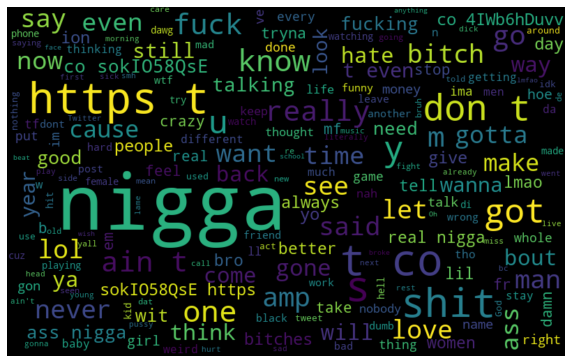

In [29]:
# world cloud to see frequent words in tweets.

all_words = ' '.join([text for text in df1['tweet']])

from wordcloud import WordCloud

import matplotlib.pyplot as plt 

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)


plt.figure(figsize=(10, 7))

plt.imshow(wordcloud, interpolation="bilinear")

plt.axis('off')

plt.show()


In [30]:
# preprocessing and removing  non english tweets

import preprocessor as p

from langdetect import detect 

def preprocess(input_txt):
    
    try:
        if detect(input_txt) == 'en':
            pattern = "[^@[\w]+]| [a-zA-Z]+"
            result = ''.join(re.findall(pattern, input_txt))
            return result

    except Exception as e:
        print(e)

In [31]:
# clean the tweets and remove non-english tweets

df1['tweet'] = np.vectorize(preprocess)(df1['tweet'].astype(str))

No features in text.
No features in text.
No features in text.
No features in text.


In [32]:
print(df1['tweet'].head())
df1['tweet'].replace('None', np.nan, inplace=True)
print("\nLength before deleting: ", len(df1))
df1.dropna(subset=['tweet'], how ='all', inplace = True)
df1 = df1.reset_index()
print("Length after deleting: ", len(df1))
print("Empty values: ", df1.tweet.isnull().sum())


0     you want a bad bitch then go get one I forgot...
1                 a real one Birthdayyyy My nigga lyfe
2     I love to see it And when he dubbed back and ...
3       BEEN FUCK THEM OTHA NIGGAS ILL DIE FA MY NIGGA
4         really saying Tony Parker better than T Lmao
Name: tweet, dtype: object

Length before deleting:  1400
Length after deleting:  1144
Empty values:  0


In [33]:
df1['tweet'].head()

0     you want a bad bitch then go get one I forgot...
1                 a real one Birthdayyyy My nigga lyfe
2     I love to see it And when he dubbed back and ...
3       BEEN FUCK THEM OTHA NIGGAS ILL DIE FA MY NIGGA
4         really saying Tony Parker better than T Lmao
Name: tweet, dtype: object

In [34]:
lemmatizer = WordNetLemmatizer()

In [35]:
tweets = []
for i in df1['tweet']:
    tweets.append(i)
tweets

[' you want a bad bitch then go get one I forgot you niggas is bums that why you can get one',
 ' a real one Birthdayyyy My nigga lyfe',
 ' I love to see it And when he dubbed back and ask the nigga was he ok then knocked em out again really sent me',
 ' BEEN FUCK THEM OTHA NIGGAS ILL DIE FA MY NIGGA',
 ' really saying Tony Parker better than T Lmao',
 ' How about when dude in orange starts to come to he says ok my nigga and knocks him out again',
 ' don even be the hoes running they mouth it be the niggas',
 ' don even be liking these niggas fr I just have attachment issues',
 ' TIED',
 ' will tweet about but won go the store for their kids who need go the dentist get they teeth fixed',
 ' niggas be like would you rather have student loans orrrr sign your life away to the U gov and be treated like absolute shit while you ruin the lives of citizens abroad choice bud LMFAOOOO',
 ' almost made a nigga cry https',
 ' gender is a great day to be a great day nigga what the fuck',
 ' was coo

In [36]:
corpus = []
for i in range(len(tweets)):
    tweet = re.sub('[^a-zA-Z]', ' ', tweets[i])
    tweet = tweet.lower()
    tweet = tweet.split()
    tweet = [lemmatizer.lemmatize(word) for word in tweet if word not in stopwords.words('english')]
    tweet = " ".join(tweet)
    corpus.append(tweet)

for i in corpus:
    print(i)

want bad bitch go get one forgot nigga bum get one
real one birthdayyyy nigga lyfe
love see dubbed back ask nigga ok knocked em really sent
fuck otha nigga ill die fa nigga
really saying tony parker better lmao
dude orange start come say ok nigga knock
even hoe running mouth nigga
even liking nigga fr attachment issue
tied
tweet go store kid need go dentist get teeth fixed
nigga like would rather student loan orrrr sign life away u gov treated like absolute shit ruin life citizen abroad choice bud lmfaoooo
almost made nigga cry http
gender great day great day nigga fuck
cooking cooking huh
always nigga dent bumper falling want drive stupid shit probably insurance either
bettin completely double hated nigga please greet pound
shit sad nigga even attempt dribble good lord smh
see happy n pregnant w nigga know reached pinnacle peak happiness
nigga w drama man lol
lol way nigga asking question nowadays surely glad game forever ingathi ngumsebenzi lento ngoku
name anything tf ur name backnd

In [37]:
y_pred1 = tfv.transform(corpus)

prediction = classifier.predict(y_pred1)


for i in range(len(prediction)):
    print("\n" + '['  + str(i+1) + ']'  + "  "  + df1['tweet'][i] + "  "  + '[' + prediction[i] + ']')
   




[1]   you want a bad bitch then go get one I forgot you niggas is bums that why you can get one  [sexism]

[2]   a real one Birthdayyyy My nigga lyfe  [racism]

[3]   I love to see it And when he dubbed back and ask the nigga was he ok then knocked em out again really sent me  [racism]

[4]   BEEN FUCK THEM OTHA NIGGAS ILL DIE FA MY NIGGA  [sexism]

[5]   really saying Tony Parker better than T Lmao  [none]

[6]   How about when dude in orange starts to come to he says ok my nigga and knocks him out again  [racism]

[7]   don even be the hoes running they mouth it be the niggas  [sexism]

[8]   don even be liking these niggas fr I just have attachment issues  [racism]

[9]   TIED  [none]

[10]   will tweet about but won go the store for their kids who need go the dentist get they teeth fixed  [none]

[11]   niggas be like would you rather have student loans orrrr sign your life away to the U gov and be treated like absolute shit while you ruin the lives of citizens abroad choice bud L

In [38]:
# import necessary libraries 
import easyocr
import joblib


C:\ProgramData\Anaconda3\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: [WinError 127] The specified procedure could not be found
  warn(f"Failed to load image Python extension: {e}")


In [39]:
def imgtotext(links):
    
    
    reader = easyocr.Reader(['en'], gpu = False)
    
    for link in links:
        
        result = reader.readtext(link, paragraph='False', detail  = 0)
    
    corpus = []
    
    for i in range(len(result)):
        tweet = re.sub('[^a-zA-Z]', ' ', result[i])
        tweet = tweet.lower()
        tweet = tweet.split()
        tweet = [lemmatizer.lemmatize(word) for word in tweet if word not in stopwords.words('english')]
        tweet = " ".join(tweet)
        corpus.append(tweet)

    text  = " "
    text = text.join(corpus)
    
    
    vectorizer_filename= 'D:\Programming\BE PROJECT\\vectorizer.pkl'
    model_filename  = 'D:\Programming\BE PROJECT\\model.pkl'
    
    loaded_vectorizer = joblib.load(vectorizer_filename) # load vectorizer
    loaded_model = joblib.load(model_filename) # load model

    text_transformed = loaded_vectorizer.transform([text])

    print(text)
    return loaded_model.predict(text_transformed)




    

In [41]:
import joblib
vectorizer_filename= 'D:\Programming\BE PROJECT\\vectorizer.pkl'
model_filename  = 'D:\Programming\BE PROJECT\\model.pkl'
    
loaded_vectorizer = joblib.load(vectorizer_filename) # load vectorizer
loaded_model = joblib.load(model_filename) # load model

for i in range(len(df1)):
    if len(df1['photos'][i]) > 2:
        
        print("\nTweet: ", df1['tweet'][i])
    
        text_transformed =  loaded_vectorizer.transform([corpus[i]])
        text_result = loaded_model.predict(text_transformed)
    
        if text_result == 'none':
                
            text = df1['photos'][i]
            pattern = "https:[^']+"
            links = re.findall(pattern, text)

            print("\nPrediction: ", imgtotext(links))
        
        else:
            print("\nPrediction: ", text_result)



Tweet:   will come to school with no mask red nosed and sneezing like there isn a pandemic goin on https




Prediction:  ['none']

Tweet:   not even in the morning dawg you already on some females shit ew BREATHE NIGGA https

Prediction:  ['racism']

Tweet:   Niggas when they use weak ass comparisons to try and prove their point https

Prediction:  ['racism']

Tweet:   niggas are pathetic Y getting white mens name and faces tatted on you https

Prediction:  ['racism']

Tweet:   makin fun of niggas looks now bet https

Prediction:  ['racism']

Tweet:   hit me up to check yo music out when you don even check mines out told folks ass no then he blocked me bitch ass nigga go cry https

Prediction:  ['sexism']

Tweet:   morning let get this day out the way a nigga got dreams to build https

Prediction:  ['racism']

Tweet:   Oleksandrovych Zelenskyy is a Ukrainian politician former actor and comedian who has been serving as the president of Ukraine since Wikipedia This nigga is even a comedian he thought this is a movie scene https

Prediction:  ['racism']

Tweet:   won miss a nigga Choppa won m

wll fnb   dis chem looking siace nature choice wholerood specialist activated charcoal  lifestyle food lifestyle food activated charcoal ioog k price r benefit point discovery mile dischem co za private

Prediction:  ['none']

Tweet:   those who didn understand read Nairamarley tweet https


dp p x pm tweet nairamarley officialnairam h ndlea released mohbad physically assaulting zinoleesky still custody boy lot stress ambushed middle night warrant urgently returning lagos k ymcmb nigga iboucmb ja en reponse officialnairam alhamdulillah mohbad sha allah free mohbad soon plus safe trip good luck traduire le tweet fevr twitter android ili voir activite du tweet retweets tweet cite j aime  tweeter votre reponse

Prediction:  ['none']

Tweet:   feel like I wanna be that guy my niggas or my part influencers that gonna get them like I really had a minute with that guy and his really sharing a little piece of me to the world must be nice Thoughts yoh must be the https

Prediction:  ['racism']

Tweet:   This nigga tripp https

Prediction:  ['racism']

Tweet:   War been like this for centuries Men minding they business coming together to fight for the president just cuz he dnt like the way a nigga talk to him https

Prediction:  ['racism']

Tweet:   be like I like your song let coll



Prediction:  ['none']

Tweet:   boy t nigga that me rooted from the bottom bloomed into a tree https

Prediction:  ['racism']

Tweet:   not have him say ooh ah ah since you already goin there https


HTTPError: HTTP Error 403: Forbidden

In [47]:
import joblib
vectorizer_filename= 'D:\Programming\BE PROJECT\\vectorizer.pkl'
model_filename  = 'D:\Programming\BE PROJECT\\model.pkl'
    
loaded_vectorizer = joblib.load(vectorizer_filename) # load vectorizer
loaded_model = joblib.load(model_filename) # load model


# for i in range(len(df1)):
#     hashtags = ""
#     if len(df1['hashtags'][i]) > 2:
#         text = df1['hashtags'][i]
#         pattern = "\w+"
#         hashtags = " ".join(re.findall(pattern, text))
#         print("\nTweet: ", df1['tweet'][i])
#         text_transformed = loaded_vectorizer.transform([hashtags])
#         print("\nHashtags: ", df1['hashtags'][i])
#         print("\nPrediction: ", loaded_model.predict(text_transformed))





for i in range(len(df1)):
    
    print("\nTweet: ", df1['tweet'][i])
    
    text_transformed =  loaded_vectorizer.transform([corpus[i]])
    text_result = loaded_model.predict(text_transformed)

    hashtags_result = 'none'
    hashtags = ""
    
    if len(df1['hashtags'][i]) > 2:
        
        text = df1['hashtags'][i]
        pattern = "\w+"
        hashtags = " ".join(re.findall(pattern, text))
        
        print("\nHashtags: ", df1['hashtags'][i])
        
        hashtags_transformed = loaded_vectorizer.transform([hashtags])
        hashtags_result = loaded_model.predict(hashtags_transformed)
    else:
        print("\nHashtags: No hashtags!!")
                
    if ( text_result != 'none') :
       
        print("\nPrediction : ", text_result)
    
    elif (hashtags_result != 'none') :
        
        print("\nPrediction : ", hashtags_result)

    elif text_result == 'none' and hashtags_result == 'none':
        print("\nPrediction : None")

        
        


Tweet:   you want a bad bitch then go get one I forgot you niggas is bums that why you can get one

Hashtags: No hashtags!!

Prediction :  ['sexism']

Tweet:   a real one Birthdayyyy My nigga lyfe

Hashtags: No hashtags!!

Prediction :  ['racism']

Tweet:   I love to see it And when he dubbed back and ask the nigga was he ok then knocked em out again really sent me

Hashtags: No hashtags!!

Prediction :  ['racism']

Tweet:   BEEN FUCK THEM OTHA NIGGAS ILL DIE FA MY NIGGA

Hashtags: No hashtags!!

Prediction :  ['sexism']

Tweet:   really saying Tony Parker better than T Lmao

Hashtags: No hashtags!!

Prediction : None

Tweet:   How about when dude in orange starts to come to he says ok my nigga and knocks him out again

Hashtags: No hashtags!!

Prediction :  ['racism']

Tweet:   don even be the hoes running they mouth it be the niggas

Hashtags: No hashtags!!

Prediction :  ['sexism']

Tweet:   don even be liking these niggas fr I just have attachment issues

Hashtags: No hashtags!!

